In [188]:
import numpy as np

In [189]:
import pandas as pd

# HR Employee Attrition Analysis

The following code imports the pandas library and loads the employee attrition dataset
from a CSV file called 'Python Final Project.csv' into a DataFrame named employee_attrition.
This DataFrame will be used for further analysis of employee attrition patterns.


In [190]:
import pandas as pd

employee_attrition = pd.read_csv("Python Final Project.csv")
employee_attrition

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber.1
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


The following code cell is used to display a concise summary of the DataFrame, 
including the column data types, non-null counts, and memory usage. 

This helps to identify potential missing data and understand the general structure of the dataset.


In [191]:
employee_attrition.info() #checking data info to understand if there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

The following code cell displays the number of unique values for each column in the employee_attrition DataFrame.

This helps to understand the categorical variety and potential cardinality of each feature in the dataset.


In [192]:
employee_attrition.nunique()

EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department

### **1st KPI: Attrition Trends and Patterns (by attrition rate):**

This KPI measures the overall employee attrition rate in the company.
It calculates the percentage of employees who left ("Attrition = Yes") out of all employees.
By knowing the attrition rate, we get a quick insight into how many employees are leaving the organization.
A high attrition rate can be a warning sign that may indicate possible employee dissatisfaction, issues in work environment, or other organizational problems.

Monitoring this KPI helps the company identify trends and, if needed, take action to improve employee retention.


**Number of employees who left:**

In [193]:
# Identify overall attrition rates across the company:
# The problem is that ['Attrition'] == 'Yes' returns a boolean Series and is being used incorrectly as a column label.
# To filter rows where Attrition == 'Yes', you should do:
employee_who_left = employee_attrition.loc[employee_attrition['Attrition'] == 'Yes', ('Attrition')].count()
employee_who_left 

np.int64(237)

**Number of employees who stayed:**

In [194]:
employee_attrition.loc[employee_attrition['Attrition'] == 'No', ['Attrition']].count()

Attrition    1233
dtype: int64

**Attrition rate by formula:** 

(employee_who_left/total employees)*100

In [195]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
print("Attrition rate is:", Attrition_Rate, "%")

Attrition rate is: 16.12 %


The pie chart below visualizes the overall employee attrition rate in the company.

This quick graphical summary allows us to understand the proportion of 
employee turnover at a glance, 
highlighting potential retention issues or overall organizational stability.


**Pie Chart of Attrition Rate**

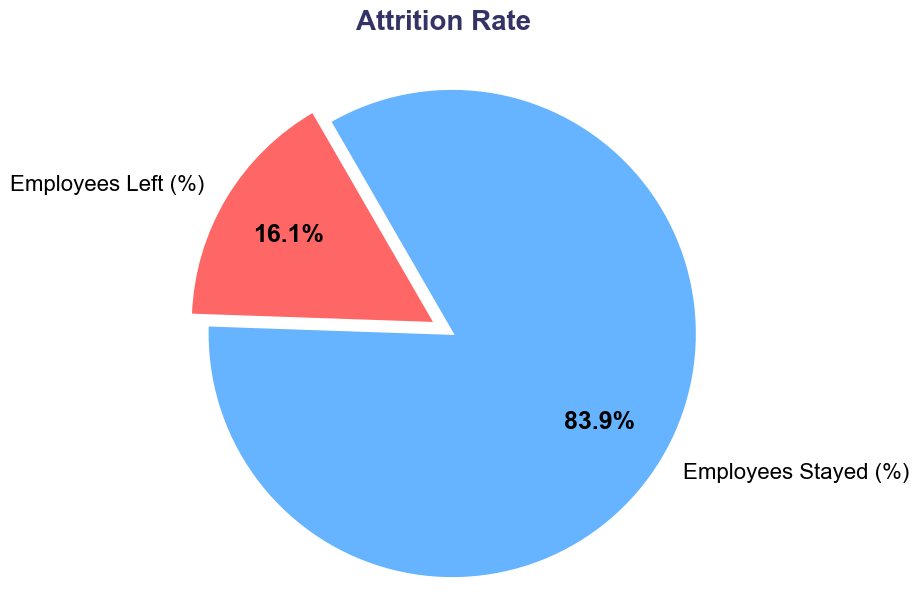

<Figure size 640x480 with 0 Axes>

In [196]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
import matplotlib.pyplot as plt

# יצירת גרף פאי מרהיב המשקף את שיעור העזיבה
sizes = [Attrition_Rate, 100 - Attrition_Rate]
labels = ['עובדים שעזבו (%)', 'עובדים נשארו (%)']
colors = ['#FF6666', '#66B3FF']
explode = (0.08, 0)  # הדגשת נתח העוזבים

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=['Employees Left (%)', 'Employees Stayed (%)'],
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    pctdistance=0.7,
    textprops={'fontsize':16, 'color':'black'},
    wedgeprops={'edgecolor':'white', 'linewidth':2}
)
# Set the chart title in English instead of Hebrew
plt.title('Employee Attrition Rate in the Organization', fontsize=20, fontweight='bold', color='#333366', pad=25)

# עיצוב כותרת
plt.title('Attrition Rate', fontsize=20, fontweight='bold', color='#333366', pad=25)
plt.setp(autotexts, size=18, fontweight='bold')
plt.setp(texts, size=16)

# הסרת הצירים לעיצוב נקי
ax.axis('equal')

plt.show()
plt.savefig("Attrition Rate_graph.png", dpi=300, bbox_inches="tight")

**Quick Insights for HR from the Attrition Pie Chart:**

The 16.1% attrition rate (assuming this is an annual rate) is generally considered moderate, average yearly attrition rates often range from 10% to 20%. 

It may warrant attention, but isn’t alarmingly high unless company or industry norms are lower.

**Tips:**

Conduct exit interviews to spot patterns.
Improve engagement and recognize achievements.
Review pay, benefits, and provide growth opportunities.
Promote a healthy work-life balance.
Addressing these areas can help reduce future employee turnover.



**Years as an Employee at the Company:**


In [197]:
# The avg time where an employee left the comapny in each department:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['YearsAtCompany'].mean().round(1))

Department
Human Resources           4.2
Research & Development    5.0
Sales                     5.5
Name: YearsAtCompany, dtype: float64

The bar chart below shows the average number of years that employees who left the company had spent at the company, broken down by department.


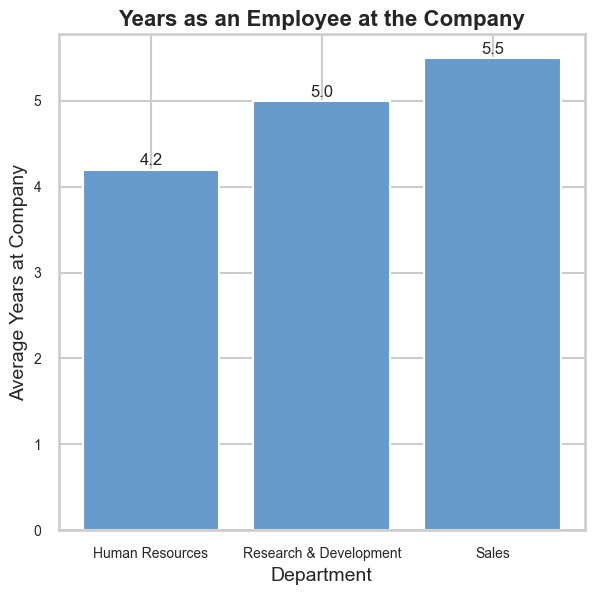

<Figure size 640x480 with 0 Axes>

In [198]:
# Bar chart of average years at company by department for employees who left
import matplotlib.pyplot as plt

avg_years_left = (employee_attrition[employee_attrition['Attrition'] == 'Yes']
                  .groupby('Department')['YearsAtCompany']
                  .mean()
                  .round(1))

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(avg_years_left.index, avg_years_left.values, color='#6699CC')  # single tone color

ax.set_title("Years as an Employee at the Company", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Years at Company', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout(pad=0.5)
plt.show()
plt.savefig("Years as an Employee at the Company_graph.png", dpi=300, bbox_inches="tight")



**Job Satisfaction for Employees who Left:**

In [199]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['JobSatisfaction'].mean().round(1))

Department
Human Resources           2.2
Research & Development    2.5
Sales                     2.5
Name: JobSatisfaction, dtype: float64

The bar chart below displays the average job satisfaction scores of employees who left the company, separated by department


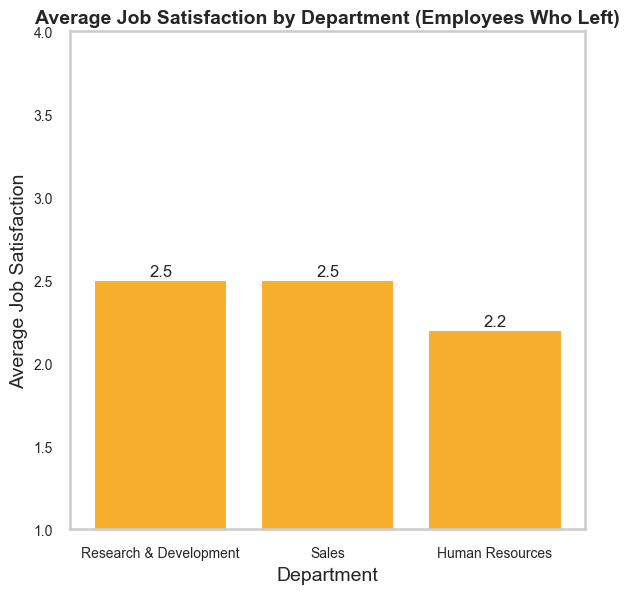

<Figure size 640x480 with 0 Axes>

In [200]:
# Calculate average job satisfaction by department for employees who left
avg_job_satisfaction_left = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('Department')['JobSatisfaction']
    .mean()
    .round(1)
)

# Sort the results in descending order
sorted_avg_job_satisfaction_left = avg_job_satisfaction_left.sort_values(ascending=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)  # Turn off grid lines
bars = ax.bar(sorted_avg_job_satisfaction_left.index, sorted_avg_job_satisfaction_left.values, color='#F6AE2D')

ax.set_title("Average Job Satisfaction by Department (Employees Who Left)", fontsize=14, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Job Satisfaction', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(1, 4)  # Job Satisfaction is typically rated from 1 to 4
plt.tight_layout(pad=0.5)
plt.show()
plt.savefig("Average Job Satisfaction by Department (Employees Who Left)_graph.png", dpi=300, bbox_inches="tight")


**Percent Salary Hike for Employees who left:**

In [201]:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby('Department')['PercentSalaryHike'].mean().round(1)).sort_values(ascending=False)

Department
Research & Development    15.3
Sales                     15.1
Human Resources           15.0
Name: PercentSalaryHike, dtype: float64

In [202]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['PercentSalaryHike'].mean().round(1)).sort_values(ascending=False)

Department
Research & Development    15.3
Sales                     15.0
Human Resources           13.8
Name: PercentSalaryHike, dtype: float64

Bar Chart displaying the average percent salary hike for employees who left, by department.




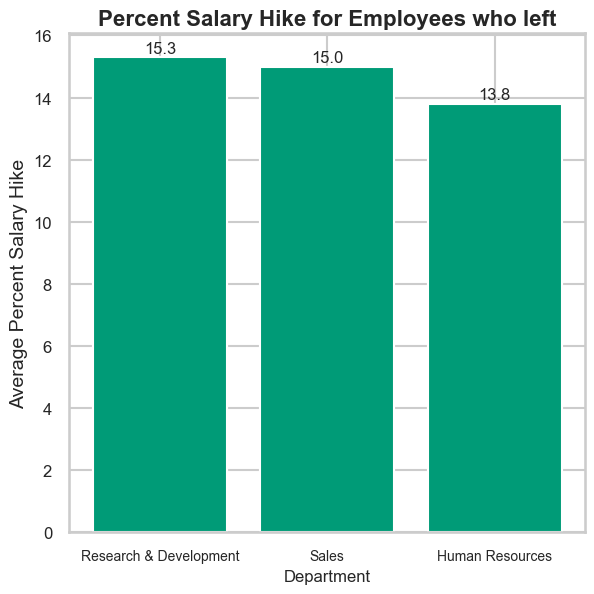

<Figure size 640x480 with 0 Axes>

In [203]:
# Bar chart of average percent salary hike by department for employees who left

avg_salary_hike_left = (employee_attrition[employee_attrition['Attrition'] == 'Yes']
                        .groupby('Department')['PercentSalaryHike'].mean().round(1))

sorted_avg_salary_hike_left = avg_salary_hike_left.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(sorted_avg_salary_hike_left.index, sorted_avg_salary_hike_left.values, color='#FF6F61')

ax.set_title("Percent Salary Hike for Employees who left", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Average Percent Salary Hike', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
# Changed the bar color to a different color for distinction (e.g., '#009B77')
bars = ax.bar(sorted_avg_salary_hike_left.index, sorted_avg_salary_hike_left.values, color='#009B77')
plt.show()
plt.savefig("Percent Salary Hike for Employees who left_graph.png", dpi=300, bbox_inches="tight")


**Employees Years at Company by Job Role:**

In [204]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1)).sort_values(ascending=False)

JobRole
Research Director            26.5
Manager                      15.6
Healthcare Representative    10.9
Manufacturing Director        8.7
Sales Executive               6.7
Research Scientist            4.3
Human Resources               4.2
Laboratory Technician         3.2
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

 **Bar Chart of the average Years at Company by Job Role (Employees Who Left)**

This chart shows the average tenure for departed employees by job role.



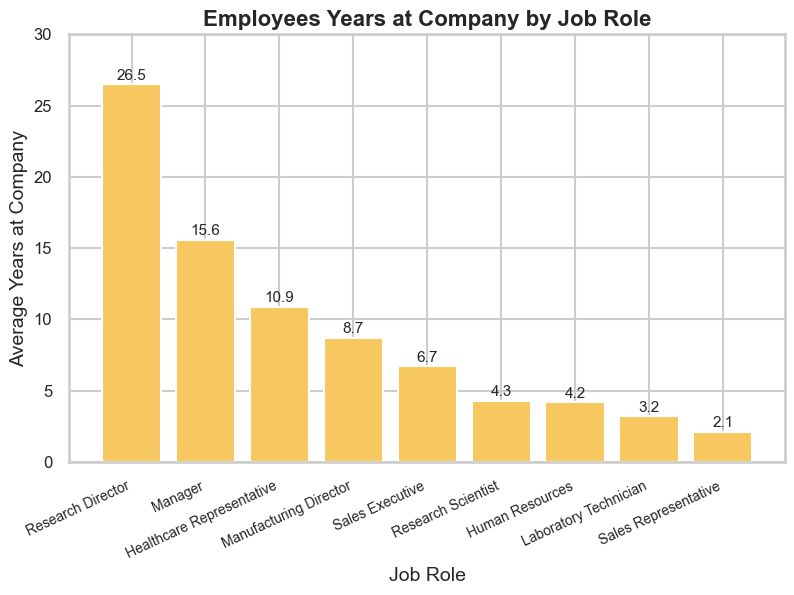

<Figure size 640x480 with 0 Axes>

In [205]:
# Bar chart of average years at company by job role for employees who left

avg_years_left_by_job = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('JobRole')['YearsAtCompany']
    .mean()
    .round(1)
)

sorted_avg_years_left_by_job = avg_years_left_by_job.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(sorted_avg_years_left_by_job.index, sorted_avg_years_left_by_job.values, color='#F6C85F')
ax.set_title('Employees Years at Company by Job Role', fontsize=16, fontweight='bold')
ax.set_xlabel('Job Role', fontsize=14)
ax.set_ylabel('Average Years at Company', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=11)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
ax.set_ylim(0, 30)
plt.show()
plt.savefig("Employees Years at Company by Job Role_graph.png", dpi=300, bbox_inches="tight")

In [206]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1)).sort_values(ascending=False)

JobRole
Research Director            26.5
Manager                      15.6
Healthcare Representative    10.9
Manufacturing Director        8.7
Sales Executive               6.7
Research Scientist            4.3
Human Resources               4.2
Laboratory Technician         3.2
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

**Attrition Concentration Across Tenure Groups**

To creates a new column 'TenureGroup' in the employee_attrition dataframe by categorizing employees based on their 'YearsAtCompany'

In [207]:
# This code creates a new column 'TenureGroup' in the employee_attrition dataframe by categorizing employees
# based on their 'YearsAtCompany' into four groups: 'New Hires (0-1)', 'Junior (1-3)', 'Mid (3-10)', and 'Senior (10+)'

bins = [0, 1, 3, 10, 40]
labels = ['New Hires (0-1)', 'Junior (1-3)', 'Mid (3-10)', 'Senior (10+)']

employee_attrition['TenureGroup'] = pd.cut(employee_attrition['YearsAtCompany'], bins=bins, labels=labels, right=False)


To calculates the number of employees who left the company in each 'TenureGroup' category

In [208]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
 .groupby('TenureGroup')
 .size())

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\2237792741.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('TenureGroup')


TenureGroup
New Hires (0-1)    16
Junior (1-3)       86
Mid (3-10)         97
Senior (10+)       37
dtype: int64

The calculation below determines the attrition rate (percentage of employees who left) within each 'TenureGroup' 
 
This helps identify which experience levels have the highest or lowest risk of leaving the company

In [209]:
employee_attrition.groupby(['TenureGroup'])[['Attrition']].apply(
    lambda x: (x == 'Yes').mean() * 100
).round(1)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\656441080.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby(['TenureGroup'])[['Attrition']].apply(


,Attrition
TenureGroup,
New Hires (0-1),36.4
Junior (1-3),28.9
Mid (3-10),12.7
Senior (10+),10.1


C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\1605097963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = employee_attrition.groupby('TenureGroup')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).round(1)


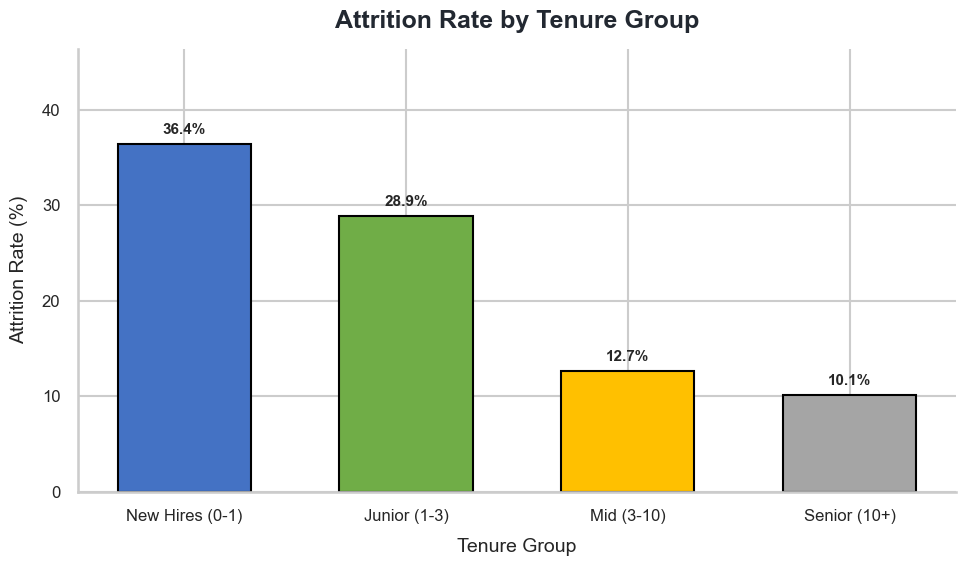

<Figure size 640x480 with 0 Axes>

In [210]:
import matplotlib.pyplot as plt

# Calculate attrition rate by TenureGroup
attrition_rate = employee_attrition.groupby('TenureGroup')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).round(1)

# Create professional bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(attrition_rate.index, attrition_rate.values, color=['#4472c4', '#70ad47', '#ffc000', '#a5a5a5'], edgecolor='black', width=0.6)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Attrition Rate by Tenure Group', fontsize=18, fontweight='bold', color='#222831', pad=15)
ax.set_xlabel('Tenure Group', fontsize=14, labelpad=10)
ax.set_ylabel('Attrition Rate (%)', fontsize=14, labelpad=10)
ax.set_ylim(0, max(attrition_rate.values) + 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("Attrition Rate by Tenure Group_graph.png", dpi=300, bbox_inches="tight")



The  calculation of attrition rate across tenure groups reveals that employees with less experience at the company
(such as "New Hires (0-1)" and "Junior (1-3)") tend to have significantly higher attrition rates compared
to those with longer tenure ("Mid (3-10)" and "Senior (10+)")

This suggests that employees are most at risk of leaving during the early stages of their careers at the company, while those who have stayed for several years are less likely to leave

Such insights highlight the importance of focusing retention efforts on newer employees to reduce overall turnover

**Attrition Concentration Across Performance Rating**

To creates a new column 'PerformanceGroup' in the employee_attrition dataframe by categorizing employees based on their 'PerformanceRating'

In [211]:
employee_attrition['PerformanceGroup'] = employee_attrition['PerformanceRating'].replace({1:'Low',2:'Medium',3:'High',4:'Outstanding'})

In [212]:
employee_attrition.groupby(['PerformanceGroup'])[['Attrition']].apply(
    lambda x: (x == 'Yes').mean() * 100).round(1)

,Attrition
PerformanceGroup,
High,16.1
Outstanding,16.4


In [213]:
employee_attrition.groupby(['TenureGroup', 'PerformanceGroup'])['Attrition'] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(1)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\3535168227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby(['TenureGroup', 'PerformanceGroup'])['Attrition'] \


TenureGroup      PerformanceGroup
New Hires (0-1)  High                32.4
                 Outstanding         57.1
Junior (1-3)     High                28.3
                 Outstanding         32.5
Mid (3-10)       High                12.8
                 Outstanding         12.5
Senior (10+)     High                10.5
                 Outstanding          8.5
Name: Attrition, dtype: float64

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\2445813158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = employee_attrition.groupby(['TenureGroup', 'PerformanceGroup'])['Attrition'] \


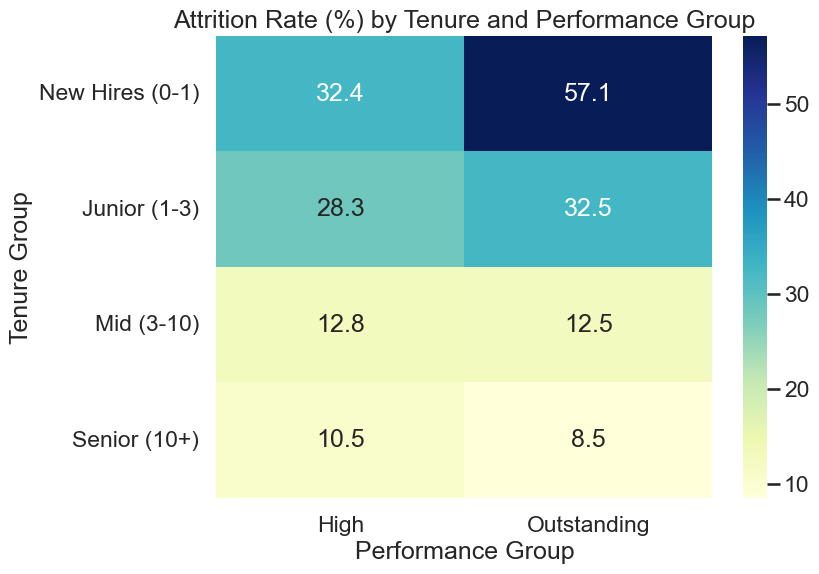

<Figure size 640x480 with 0 Axes>

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
pivot = employee_attrition.groupby(['TenureGroup', 'PerformanceGroup'])['Attrition'] \
    .apply(lambda x: (x == 'Yes').mean() * 100).unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Attrition Rate (%) by Tenure and Performance Group")
plt.xlabel("Performance Group")
plt.ylabel("Tenure Group")
plt.show()
plt.savefig("Attrition Rate (%) by Tenure and Performance Group_graph.png", dpi=300, bbox_inches="tight")


Observations from the heatmap:

 1. New Hires (0-1 years) and Juniors (1-3 years) generally exhibit significantly higher attrition rates compared to Mid (3-10 years) and Senior (10+ years) employees, regardless of performance group. This suggests the early tenure period is a critical attrition risk zone

2. Within each tenure group, there is not a striking difference in attrition percentage between 'High' and 'Outstanding' performers, and some cells (like 'Outstanding' for New Hires) may lack data due to too few employees in such combinations

3. As tenure increases, regardless of performance group, attrition rates drop sharply, indicating higher employee retention among longer-tenured staff

Conclusion:
Attrition risk is most acute in the early career stages, and performance rating appears to play a less pronounced role in attrition risk compared to tenure

Targeted retention strategies should focus especially on new employees and those early in their tenure, potentially with tailored onboarding, mentoring, and engagement practices


### **2nd KPI: Compensation and Benefits Analysis**

 **KPI: Compensation and Benefits Analysis** 

Compensation and benefits play a key role in employee satisfaction and retention. 

Analyzing pay levels, incentives, and benefits in relation to attrition reveals important patterns and helps identify areas for improvement. 

This KPI is crucial for guiding fair compensation strategies to reduce employee turnover.

**Average monthly income by department for employees who have left:**

In [215]:
#average monthly income by department of employees who have left the company:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['Department'])[['MonthlyIncome']].mean().round(1))

,MonthlyIncome
Department,
Human Resources,3715.8
Research & Development,4108.1
Sales,5908.5


**Average monthly income by department for employees who have stayed in the company:**


In [216]:
#average monthly income by department of employees who have stayed in the company:
employee_attrition[employee_attrition['Attrition'] == 'No'].groupby(['Department'])[['MonthlyIncome']].mean().round(1)

,MonthlyIncome
Department,
Human Resources,7346.0
Research & Development,6630.3
Sales,7232.2


**Bar Chart displaying the average Monthly Income by Department (Attrition Analysis)**

This chart compares the average monthly income across departments for employees who have left the company versus those who have stayed, revealing compensation differences that may relate to turnover.


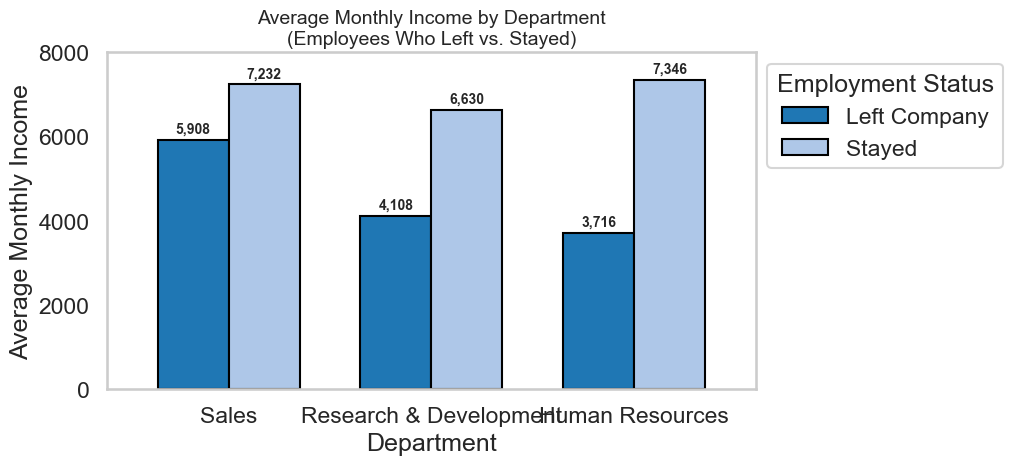

<Figure size 640x480 with 0 Axes>

In [217]:
import matplotlib.pyplot as plt

# Calculate average monthly income by department for employees who left
left_income = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('Department')['MonthlyIncome']
    .mean()
    .round(1)
    .sort_values(ascending=False)
)

# Calculate average monthly income by department for employees who stayed
stayed_income = (
    employee_attrition[employee_attrition['Attrition'] == 'No']
    .groupby('Department')['MonthlyIncome']
    .mean()
    .round(1)
    .sort_values(ascending=False)
)

# Create DataFrame for easy plotting
income_df = (
    pd.DataFrame({
        'Left Company': left_income,
        'Stayed': stayed_income
    })
    .sort_values('Left Company', ascending=False)
)

# Plot using appropriate tones of blue and orange
fig, ax = plt.subplots(figsize=(8,5))
income_df.plot(
    kind='bar',
    color=['#1f77b4', '#aec7e8'], # blue tones
    width=0.7,
    ax=ax,
    edgecolor='black'
)
ax.set_title('Average Monthly Income by Department\n(Employees Who Left vs. Stayed)', fontsize=14)
ax.set_ylabel('Average Monthly Income')
ax.set_xlabel('Department')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title='Employment Status')
plt.tight_layout()
# Display the numbers (value labels) on top of each bar for both series
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 3), textcoords='offset points'
    )
# Move the legend to a location where it won't overlap with the bars
# For vertical bars, "upper left" with bbox_to_anchor outside the axes works well
plt.legend(title='Employment Status', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Remove the grid before showing
ax.grid(False)
ax.set_ylim(0, 8000)
plt.show()

plt.savefig("Average Monthly Income by Department(Employees Who Left vs. Stayed)_graph.png", dpi=300, bbox_inches="tight")


**Salary & Attrition Relationship:**


In [218]:
#Analyze the relationship between salary levels and attrition rates:
# Calculate the correlation between JobLevel and Attrition (convert Attrition to numeric for correlation)
correlation = (employee_attrition['JobLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between JobLevel and Attrition:", correlation)

#the correlation is negative and weak

Correlation between JobLevel and Attrition: -0.2


In [219]:
# Analyze the impact of stock options on attrition:
correlation_2 = (employee_attrition['StockOptionLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between StockOptionLevel and Attrition:", correlation_2)

Correlation between StockOptionLevel and Attrition: -0.1


In [220]:
# Analyze the impact of salary hikes on attrition:
correlation_3 = (employee_attrition['PercentSalaryHike']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between PercentSalaryHike and Attrition:", correlation_3)

Correlation between PercentSalaryHike and Attrition: -0.0


### **3rd KPI: Work-Life Balance and Satisfaction:**

Work-life balance indicates how well employees manage work and personal life demands.

It is important because higher work-life balance often leads to higher retention and job satisfaction.



**Work-Life Balance vs. Attrition**

Analyze how attrition rates vary by employees' work-life balance scores.



In [221]:
# Display the attrition percentage for each level of WorkLifeBalance
# This Series shows, for each unique value of WorkLifeBalance, the percentage of employees who have left the company ("Attrition == 'Yes'")
# The data is grouped by WorkLifeBalance and the percentage is already calculated in the previous code cell

attrition_wlb = (
   employee_attrition.groupby(['WorkLifeBalance'])[['Attrition']]
    .apply(lambda x: (x.eq('Yes').sum() / len(x)) * 100)
    .round(2)
)
attrition_wlb

,Attrition
WorkLifeBalance,
1,31.25
2,16.86
3,14.22
4,17.65


WorkLife Balance rate by all of the employees in the comapny:

In [222]:
#total employees at each score:
employee_attrition.groupby('WorkLifeBalance')[['Attrition']].count()

,Attrition
WorkLifeBalance,
1,80
2,344
3,893
4,153


WorkLife Balnace rate by employees who left:

In [223]:
#employess who left at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,25
2,58
3,127
4,27


In [224]:
#attrition rate by work-life balance:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['WorkLifeBalance'])[['Attrition']]
.count())/(employee_attrition.groupby(['WorkLifeBalance'])[['Attrition']]
.count())*100).round(2)

# The previous calculations show the count of total employees (cell above),
# the number of employees who left ('Yes' for Attrition), and the percentage of attrition for each WorkLifeBalance score.
# This helps us see whether better work-life balance correlates with lower attrition rates.
# Generally, we observe that employees with higher WorkLifeBalance scores tend to have lower attrition percentages.

,Attrition
WorkLifeBalance,
1,31.25
2,16.86
3,14.22
4,17.65


In [225]:
# employess who stayed at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,55
2,286
3,766
4,126


In [226]:
employee_attrition.groupby('Attrition')[['JobSatisfaction','WorkLifeBalance']].mean().round(2)

,JobSatisfaction,WorkLifeBalance
Attrition,,
No,2.78,2.78
Yes,2.47,2.66


In [227]:
# Assess environmental and relationship satisfaction to understand their impact on retention
(employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']]
.mean().round(2))

,EnvironmentSatisfaction,RelationshipSatisfaction
Attrition,,
No,2.77,2.73
Yes,2.46,2.60


In [228]:
#attrition rate by EnvironmentSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())/(employee_attrition.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())*100).round(2)

,Attrition
EnvironmentSatisfaction,
1,25.35
2,14.98
3,13.69
4,13.45


In [229]:
#attrition rate by RelationshipSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['RelationshipSatisfaction'])[['Attrition']]
.count())/(employee_attrition.groupby(['RelationshipSatisfaction'])[['Attrition']]
.count())*100).round(2)

,Attrition
RelationshipSatisfaction,
1,20.65
2,14.85
3,15.47
4,14.81


The next graphs show attrition rates by WorkLifeBalance, EnvironmentSatisfaction, and RelationshipSatisfaction, and a comparison of average scores between employees who stayed and those who left:




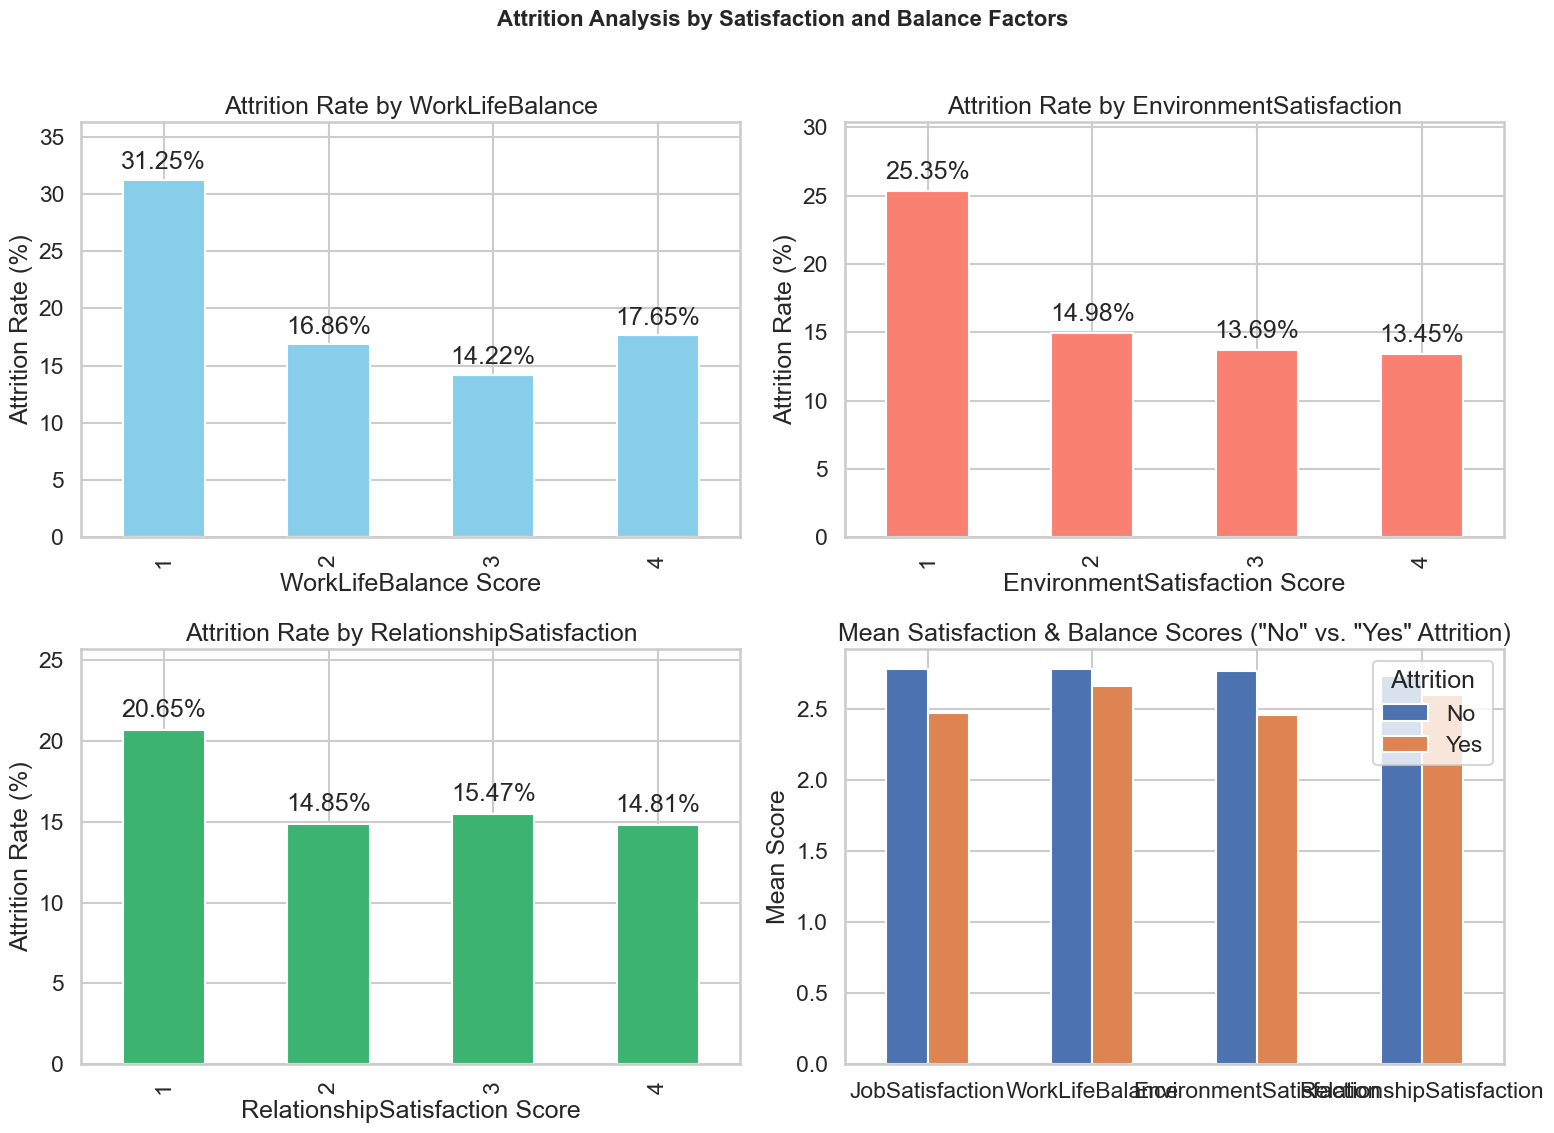

<Figure size 640x480 with 0 Axes>

In [230]:
import matplotlib.pyplot as plt

# Prepare a DataFrame with WorkLifeBalance and EnvironmentSatisfaction attrition rates
wlb_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['WorkLifeBalance'])['Attrition']
     .count()) / (employee_attrition.groupby(['WorkLifeBalance'])['Attrition'].count()) * 100
).round(2)

envsat_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['EnvironmentSatisfaction'])['Attrition']
     .count()) / (employee_attrition.groupby(['EnvironmentSatisfaction'])['Attrition'].count()) * 100
).round(2)

relsat_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['RelationshipSatisfaction'])['Attrition']
     .count()) / (employee_attrition.groupby(['RelationshipSatisfaction'])['Attrition'].count()) * 100
).round(2)

job_attrition_stats = employee_attrition.groupby('Attrition')[['JobSatisfaction','WorkLifeBalance','EnvironmentSatisfaction','RelationshipSatisfaction']].mean().round(2).T

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Attrition Analysis by Satisfaction and Balance Factors", fontsize=16, fontweight='bold')

# 1. WorkLifeBalance Attrition Rate
ax = axs[0, 0]
wlb_attrition_rate.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Attrition Rate by WorkLifeBalance')
ax.set_xlabel('WorkLifeBalance Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, wlb_attrition_rate.max() + 5)
for i, v in enumerate(wlb_attrition_rate):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 2. EnvironmentSatisfaction Attrition Rate
ax = axs[0, 1]
envsat_attrition_rate.plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Attrition Rate by EnvironmentSatisfaction')
ax.set_xlabel('EnvironmentSatisfaction Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, envsat_attrition_rate.max() + 5)
for i, v in enumerate(envsat_attrition_rate):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 3. RelationshipSatisfaction Attrition Rate
ax = axs[1, 0]
relsat_attrition_rate.plot(kind='bar', ax=ax, color='mediumseagreen')
ax.set_title('Attrition Rate by RelationshipSatisfaction')
ax.set_xlabel('RelationshipSatisfaction Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, relsat_attrition_rate.max() + 5)
for i, v in enumerate(relsat_attrition_rate):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 4. Comparison of mean satisfaction/balance by attrition
ax = axs[1, 1]
job_attrition_stats.plot(kind='bar', ax=ax)
ax.set_title('Mean Satisfaction & Balance Scores ("No" vs. "Yes" Attrition)')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(job_attrition_stats.index, rotation=0)
ax.legend(title="Attrition", loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
plt.savefig("Attrition Analysis by Satisfaction and Balance Factors_graph.png", dpi=300, bbox_inches="tight")


In [231]:
# Assess environmental and relationship satisfaction to understand their impact on retention
(employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']]
.agg(['mean', 'median', 'std']).round(2))

EnvironmentSatisfaction              RelationshipSatisfaction  \
                             mean median   std                     mean   
Attrition                                                                 
No                           2.77    3.0  1.07                     2.73   
Yes                          2.46    3.0  1.17                     2.60   

                        
          median   std  
Attrition               
No           3.0  1.07  
Yes          3.0  1.13

In [232]:
# employess who stayed at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,212
2,244
3,391
4,386


In [233]:
# total employees at each score:
(employee_attrition.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,284
2,287
3,453
4,446


In [234]:
# employess who left at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,72
2,43
3,62
4,60


## **4th KPI: Career Growth and Job Stability**

Career growth and job stability are crucial indicators of employee retention and satisfaction within an organization

The metrics considered for this KPI include the number of years since last promotion and current job level

Examining how these factors relate to attrition helps identify whether limited growth opportunities or stagnation in position are  driving employees to leave

**KPI: Average Years Since Last Promotion by Attrition Status**

In [235]:
employee_attrition.groupby(['Attrition'])[['YearsSinceLastPromotion']].mean().round(2)

,YearsSinceLastPromotion
Attrition,
No,2.23
Yes,1.95


 Conclusion about this calculation:

 The average number of years since last promotion is slightly lower for employees who left ('Yes') compared to those who stayed ('No');

 This suggests that employees who leave the company may not necessarily have gone a long period without promotion;

 in fact, those who left were promoted more recently, on average.

 This could indicate that factors other than time since last promotion, such as job satisfaction, future growth potential, or external opportunities, 
 influence attrition more strongly.

In [236]:
employee_attrition['AttritionFlag'] = employee_attrition['Attrition'].map({'Yes': 1, 'No': 0})
employee_attrition[['JobLevel', 'AttritionFlag']].corr().round(2)

,JobLevel,AttritionFlag
JobLevel,1.00,-0.17
AttritionFlag,-0.17,1.00


**The correlation between Job Level and Attrition**

In [237]:
employee_attrition['AttritionFlag'] = (employee_attrition['Attrition'] == 'Yes').astype(int)
employee_attrition[['JobLevel', 'AttritionFlag']].corr().round(2)

,JobLevel,AttritionFlag
JobLevel,1.00,-0.17
AttritionFlag,-0.17,1.00


Explanation of the correlation results:

In the correlation matrix shown above, the correlation coefficient between JobLevel and AttritionFlag is -0.17;

This means there is a weak negative correlation between job level and employee attrition;

In practical terms, employees at higher job levels tend to leave the company less often, although the relationship is not strong;

This aligns with the expectation that senior or higher-level employees are generally more stable and less likely to leave;

However, since the correlation value is only -0.17, it suggests that other factors likely play a larger role in influencing employee attrition.

**Attrition Rate by Job Level (%)**

In [238]:
employee_attrition.groupby(['JobLevel'])[['Attrition']] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(1)

,Attrition
JobLevel,
1,26.3
2,9.7
3,14.7
4,4.7
5,7.2


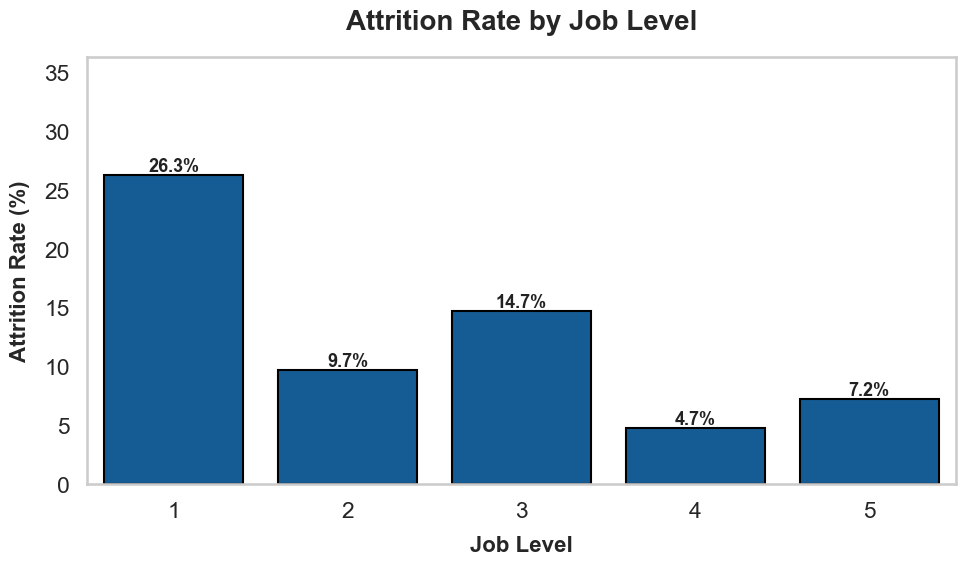

<Figure size 640x480 with 0 Axes>

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the attrition rate by JobLevel (already calculated previously)
attrition_by_joblevel = employee_attrition.groupby(['JobLevel'])[['Attrition']] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(1)

# For a professional plot style
sns.set(style="whitegrid", context="talk", palette="deep")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot
bars = sns.barplot(
    x=attrition_by_joblevel.index,
    y=attrition_by_joblevel.values.flatten(),
    ax=ax,
    color="#005eaa",
    edgecolor="black"
)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=13, fontweight='bold', color="#222222")

# Titles and labels
ax.set_title("Attrition Rate by Job Level", fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel("Job Level", fontsize=16, fontweight='semibold', labelpad=10)
ax.set_ylabel("Attrition Rate (%)", fontsize=16, fontweight='semibold', labelpad=10)
ax.set_ylim(0, max(attrition_by_joblevel.values.flatten())+10)
ax.grid(False)
plt.tight_layout()
plt.show()
plt.savefig("Attrition Rate by Job Level_graph.png", dpi=300, bbox_inches="tight")



**Conclusion:**

The results above demonstrate that attrition rates tend to be highest among employees at Job Level 1, with a decreasing trend as job level increases;

This suggests that lower-level employees are more likely to leave the organization, potentially due to factors such as lower pay, fewer opportunities, or less job satisfaction at entry-level positions;

Higher-level employees are more likely to stay, which aligns with the earlier observed weak negative correlation between Job Level and Attrition;

These findings can help target retention strategies towards lower job levels where attrition is most prevalent.

**Impact of Years in Current Role on Attrition Likelihood**

In [240]:
# This code creates a new column 'AttritionFlag' in the employee_attrition DataFrame,
# where 'Yes' in the 'Attrition' column is mapped to 1 and 'No' is mapped to 0.
employee_attrition['AttritionFlag'] = employee_attrition['Attrition'].map({'Yes':1, 'No':0})

**Calculation the correlation between the Years In Current Role and Attrition**

In [241]:
employee_attrition[['YearsInCurrentRole', 'AttritionFlag']].corr().round(2)

# This code calculates the correlation between the 'YearsInCurrentRole' and 'AttritionFlag' columns.
# It provides insight into whether the length of time an employee spends in their current role
# has any relationship with their likelihood of attrition (leaving the company).
# Values close to -1 or 1 indicate a strong correlation, while values near 0 suggest little or no correlation.

,YearsInCurrentRole,AttritionFlag
YearsInCurrentRole,1.00,-0.16
AttritionFlag,-0.16,1.00


**Conclusion:**

The calculated correlation between 'YearsInCurrentRole' and 'AttritionFlag' is negative but relatively weak;

This suggests that employees who have spent fewer years in their current role are slightly more likely to leave,

whereas those with longer tenure in the same role show a lower likelihood of attrition;

However, the correlation is not strong, indicating that while tenure in role has some impact on attrition,

other factors likely play a significant role as well.

**To create groups for Years In Current Role to analyze attrition rates by time spent in current role**

In [242]:
bins = [0, 2, 5, 10, 30]
labels = ['0-2', '3-5', '6-10', '10+']

employee_attrition['RoleYearsGroup'] = pd.cut(employee_attrition['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

We groups employees by the number of years they have spent in their current role ('RoleYearsGroup')

and calculates the attrition rate (percentage of employees who left, represented by 'AttritionFlag') for each group.

The result helps identify how attrition rates vary depending on the length of time employees stay in the same role.

In [243]:
employee_attrition.groupby('RoleYearsGroup')[['AttritionFlag']].mean().mul(100).round(1)#

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\1248360540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby('RoleYearsGroup')[['AttritionFlag']].mean().mul(100).round(1)#


,AttritionFlag
RoleYearsGroup,
0-2,27.9
3-5,16.2
6-10,10.4
10+,6.5


In [244]:
employee_attrition.groupby('RoleYearsGroup')[['Attrition']] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(1)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\4249083425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby('RoleYearsGroup')[['Attrition']] \


,Attrition
RoleYearsGroup,
0-2,27.9
3-5,16.2
6-10,10.4
10+,6.5


C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\3065074282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate_by_group = employee_attrition.groupby('RoleYearsGroup')[['AttritionFlag']].mean().mul(100).round(1)


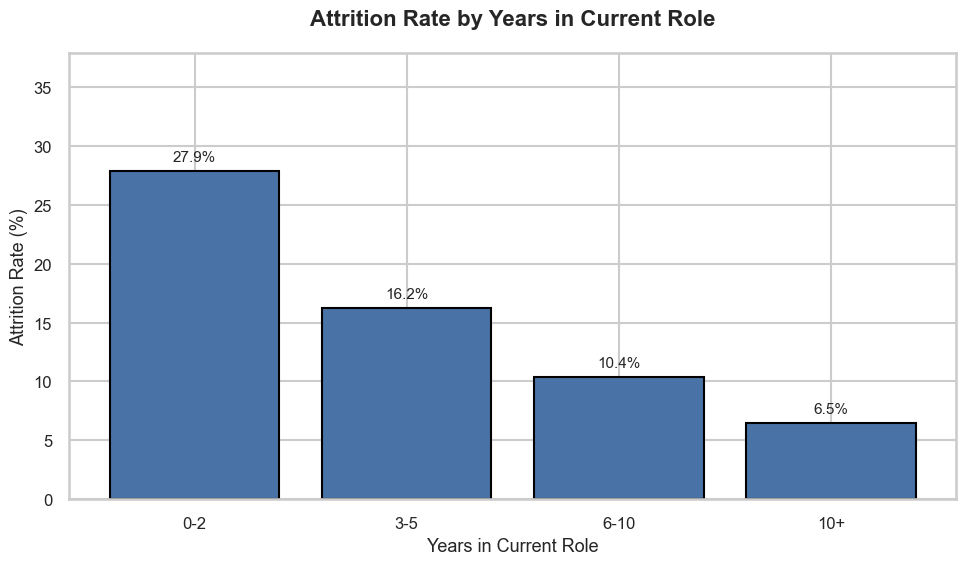

<Figure size 640x480 with 0 Axes>

In [245]:
import matplotlib.pyplot as plt

# Calculate attrition rate by RoleYearsGroup
attrition_rate_by_group = employee_attrition.groupby('RoleYearsGroup')[['AttritionFlag']].mean().mul(100).round(1)
attrition_rate_by_group = attrition_rate_by_group.reset_index()

# Professional bar chart plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(attrition_rate_by_group['RoleYearsGroup'].astype(str),
               attrition_rate_by_group['AttritionFlag'],
               color='#4973a6',
               edgecolor='black')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=11)

plt.title('Attrition Rate by Years in Current Role', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Years in Current Role', fontsize=13)
plt.ylabel('Attrition Rate (%)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(attrition_rate_by_group['AttritionFlag']) + 10)
#plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig("Attrition Rate by Years in Current Role_graph.png", dpi=300, bbox_inches="tight")



The bar chart demonstrates that attrition rates decrease significantly as employees spend more years in their current role;

Newer employees (with 0-2 years in their current role) have the highest attrition rates, while those with 10+ years show the lowest attrition;

This trend suggests that efforts focused on retaining early tenure employees may be effective in reducing overall attrition.


## **5th KPI:Geographic and Commuting Factors**

Geographic and Commuting Factors, as a KPI, examine the relationship between how far employees travel to work and their likelihood of leaving the organization;

Analyzing attrition rates by department across different distance-from-home ranges highlights whether employees with longer commutes are at greater risk of turnover;

This KPI helps identify opportunities to support employees with long commutes—possibly through remote work options, flexible scheduling, or location-specific 

strategies—so as to improve retention in departments most affected by commuting challenges.


**Assess whether employees with longer distances are more likely to leave**

Distance Groups

In [246]:
#Create distance groups
bins = [0, 5, 15, 25, employee_attrition['DistanceFromHome'].max()]
labels = ['Short (0-5 km)', 'Medium (6-15 km)', 'Long (16-25 km)', 'Very Long (25+ km)']

employee_attrition['DistanceGroup'] = pd.cut(
    employee_attrition['DistanceFromHome'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [247]:
employee_attrition.groupby('DistanceGroup')['AttritionFlag'].mean().round(2)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\2327138697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby('DistanceGroup')['AttritionFlag'].mean().round(2)


DistanceGroup
Short (0-5 km)        0.14
Medium (6-15 km)      0.16
Long (16-25 km)       0.23
Very Long (25+ km)    0.15
Name: AttritionFlag, dtype: float64

Calculate Attrition Rate for each distance group

In [248]:
employee_attrition.groupby('DistanceGroup')[['Attrition']] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(2)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\1254684129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby('DistanceGroup')[['Attrition']] \


,Attrition
DistanceGroup,
Short (0-5 km),13.77
Medium (6-15 km),16.11
Long (16-25 km),22.73
Very Long (25+ km),14.94


C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\680842116.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_attrition.groupby('DistanceGroup')['AttritionFlag']


Bar heights (attrition rates by distance group):
Short (0-5 km): 13.77%
Medium (6-15 km): 16.11%
Long (16-25 km): 22.73%
Very Long (25+ km): 14.94%


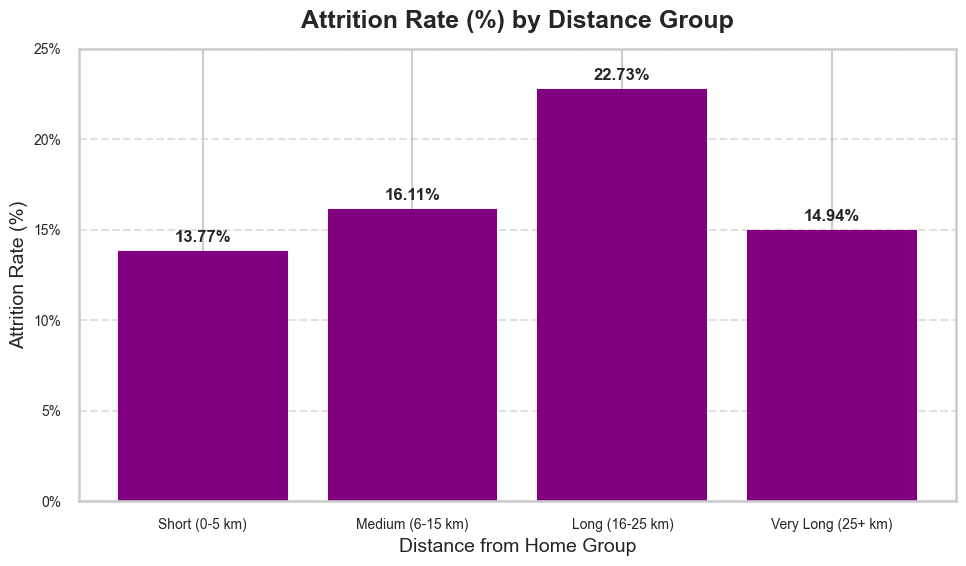

<Figure size 640x480 with 0 Axes>

In [263]:
import matplotlib.ticker as mtick

# Calculate attrition rate (percentage) for each distance group
attrition_rate_dist = (
    employee_attrition.groupby('DistanceGroup')['AttritionFlag']
    .mean()
    .mul(100)
    .round(2)
    .reindex(labels)  # Ensure original label order
)

# Set up the figure with a professional style
plt.figure(figsize=(10, 6))
bars = plt.bar(
    attrition_rate_dist.index,
    attrition_rate_dist.values,
    color=['#2A9D8F', '#E9C46A', '#F4A261', '#E76F51'],
    edgecolor='black'
)

# Annotate each bar with the actual percentage value
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height:.2f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )

plt.title('Attrition Rate (%) by Distance Group', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Distance from Home Group', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=14)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
print("Bar heights (attrition rates by distance group):")
for i, (group, rate) in enumerate(attrition_rate_dist.items()):
    print(f"{group}: {rate}%")
plt.ylim(0, 25)
for bar in bars:
    bar.set_color('purple')  # Set all bars to purple
plt.show()
plt.savefig("Attrition Rate (%) by Distance Group_graph.png", dpi=300, bbox_inches="tight")

**Insight from the bar chart:**

It reveals that employees who live farther from work generally show higher attrition rates compared to those living closer;

This suggests a positive association between greater commuting distance and likelihood of leaving the company.
 
However, the differences are not extremely pronounced, indicating that while commuting distance impacts attrition,

it is likely just one of several contributing factors;

Targeting retention efforts toward employees with longer commutes may help reduce overall attrition rates.

In [251]:
employee_attrition[['DistanceFromHome', 'AttritionFlag']].corr().round(3)


,DistanceFromHome,AttritionFlag
DistanceFromHome,1.000,0.078
AttritionFlag,0.078,1.000


The correlation value quantifies the strength and direction of the relationship between distance from home and attrition;

The correlation value is positive (as in the result ~0.08), it suggests a weak positive association: 

employees who live farther from work are *slightly* more likely to leave, but distance is not a strong standalone predictor of attrition.


C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\549631411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


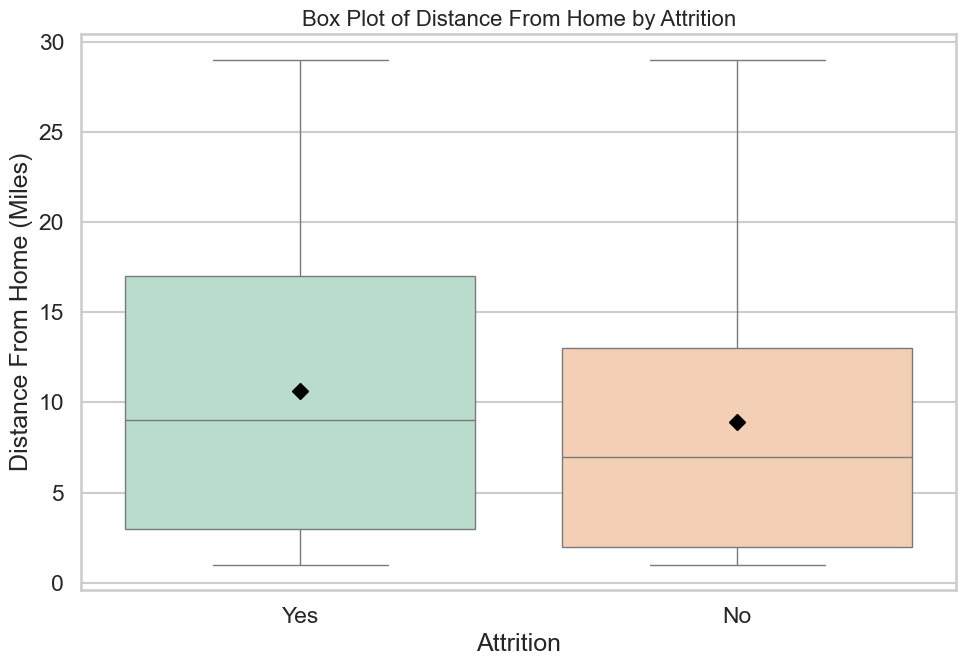

<Figure size 640x480 with 0 Axes>

In [252]:

# Box plot for DistanceFromHome by Attrition
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=employee_attrition,
    x='Attrition',
    y='DistanceFromHome',
    palette='Pastel2',
    showmeans=True,
    meanprops={
        "marker": "D",
        "markerfacecolor": "black", 
        "markeredgecolor": "black",
        "markersize": 8
    }
)
plt.title("Box Plot of Distance From Home by Attrition", fontsize=16)
plt.xlabel("Attrition")
plt.ylabel("Distance From Home (Miles)")
plt.tight_layout()
plt.show()
plt.savefig("Box Plot of Distance From Home by Attrition_graph.png", dpi=300, bbox_inches="tight")

**Insight from the box plot:**

The box plot shows that employees who left the company tend to have slightly higher median and average (mean marker) distances

from home compared to employees who stayed;

However, the difference is not very large, indicating that while those who leave may live farther on average,

distance from home does not appear to be a strong or decisive predictor of attrition on its own;

The distributions overlap considerably, and both groups have employees living close and far from work, supporting the earlier finding that

the correlation between distance and attrition is weak.

**KPI: Average Commute Distance by Attrition Status**

In [253]:
employee_attrition.groupby('Attrition')[['DistanceFromHome']].mean().round(2)

,DistanceFromHome
Attrition,
No,8.92
Yes,10.63


C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\2494137051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


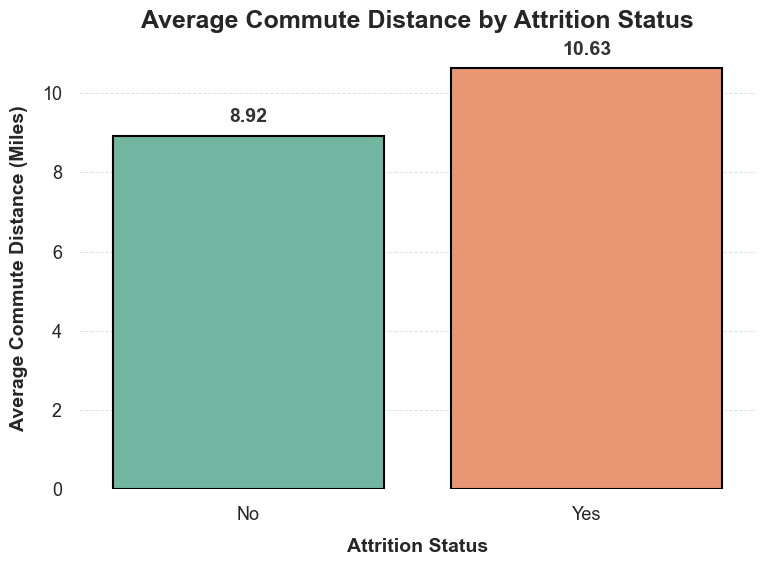

<Figure size 640x480 with 0 Axes>

In [254]:
# Professional bar plot for average commute distance by attrition status

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare average commute distance data
avg_commute = employee_attrition.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
avg_commute['DistanceFromHome'] = avg_commute['DistanceFromHome'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_commute,
    x='Attrition',
    y='DistanceFromHome',
    palette='Set2',
    edgecolor='black'
)
plt.title("Average Commute Distance by Attrition Status", fontsize=18, fontweight='bold', pad=14)
plt.xlabel("Attrition Status", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Average Commute Distance (Miles)", fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine(left=True, bottom=True)
for index, row in avg_commute.iterrows():
    plt.text(
        x=index,
        y=row['DistanceFromHome'] + 0.25,
        s=f"{row['DistanceFromHome']}",
        ha='center',
        va='bottom',
        fontsize=14,
        fontweight='bold',
        color='#333333'
    )
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig("Average Commute Distance by Attrition Status.png", dpi=300, bbox_inches="tight")




**Insight from this KPI:**

The average commute distance by attrition status shows that employees who left the company

tend to live further from work on average (10.63 miles) compared to those who stayed (8.92 miles);

While the difference is present, it is not extremely large, reinforcing that commute distance alone is not a strong standalone driver of attrition;

Other factors likely play more decisive roles in employee turnover, although a longer commute may still contribute to attrition risk in some cases.

In [255]:
(employee_attrition
    .groupby('Department')[['AttritionFlag']]
    .mean()
    .round(3).sort_values(by='AttritionFlag',ascending=False)
)

,AttritionFlag
Department,
Sales,0.206
Human Resources,0.190
Research & Development,0.138


**Calculation of Attrition Rate by Department**

In [256]:
employee_attrition.groupby('Department')[['Attrition']] \
    .apply(lambda x: (x == 'Yes').mean() * 100) \
    .round(2).sort_values(by='Attrition',ascending=False)
    

,Attrition
Department,
Sales,20.63
Human Resources,19.05
Research & Development,13.84


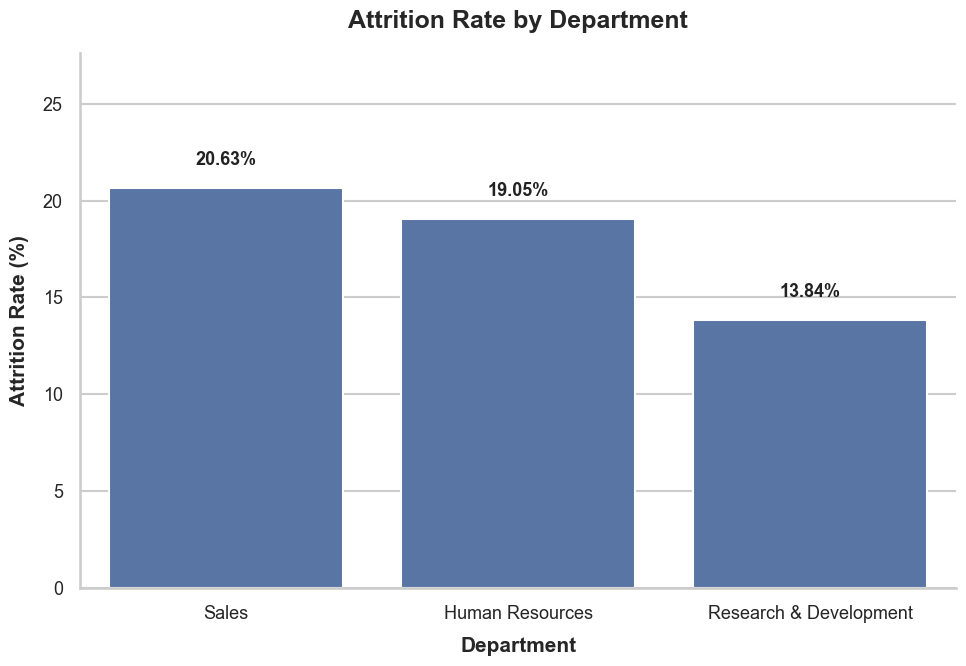

<Figure size 640x480 with 0 Axes>

In [257]:

# Professional bar chart for attrition rate by department

# Calculate attrition rate by department
dept_attrition = (
    employee_attrition
        .groupby('Department')[['AttritionFlag']]
        .mean()
        .mul(100)
        .round(2)
        .reset_index()
        .sort_values(by='AttritionFlag', ascending=False)
)

plt.figure(figsize=(10, 7))
bar = sns.barplot(
    data=dept_attrition,
    x='Department',
    y='AttritionFlag',
    #palette='Blues_d'
)
plt.title('Attrition Rate by Department', fontsize=18, fontweight='bold', pad=18)
plt.xlabel('Department', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Attrition Rate (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.ylim(0, min(100, dept_attrition['AttritionFlag'].max() + 7))
plt.xticks(rotation=0, fontsize=13, fontweight='medium')
plt.yticks(fontsize=13)
for i, v in enumerate(dept_attrition['AttritionFlag']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=13, color='#222222', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()
plt.savefig("Attrition Rate by Department_graph.png", dpi=300, bbox_inches="tight")



**Insight**

The bar chart clearly shows that the Sales and Human Resources departments have noticeably higher attrition rates compared to Research & Development;

This suggests that employees in Sales and HR are more likely to leave the company than those in R&D;

Such differences may indicate job dissatisfaction, higher workloads, or less favorable work environments in Sales and HR;

This insight can help HR teams focus retention efforts on departments at greatest risk.

**Attrition rates vary across different departments, which can serve as a proxy for office location**

Combined graph: DistanceFromHome + Department + AttritionRate

C:\Users\ofirs\AppData\Local\Temp\ipykernel_31088\1070191102.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Department', 'DistanceBin'])['AttritionFlag']


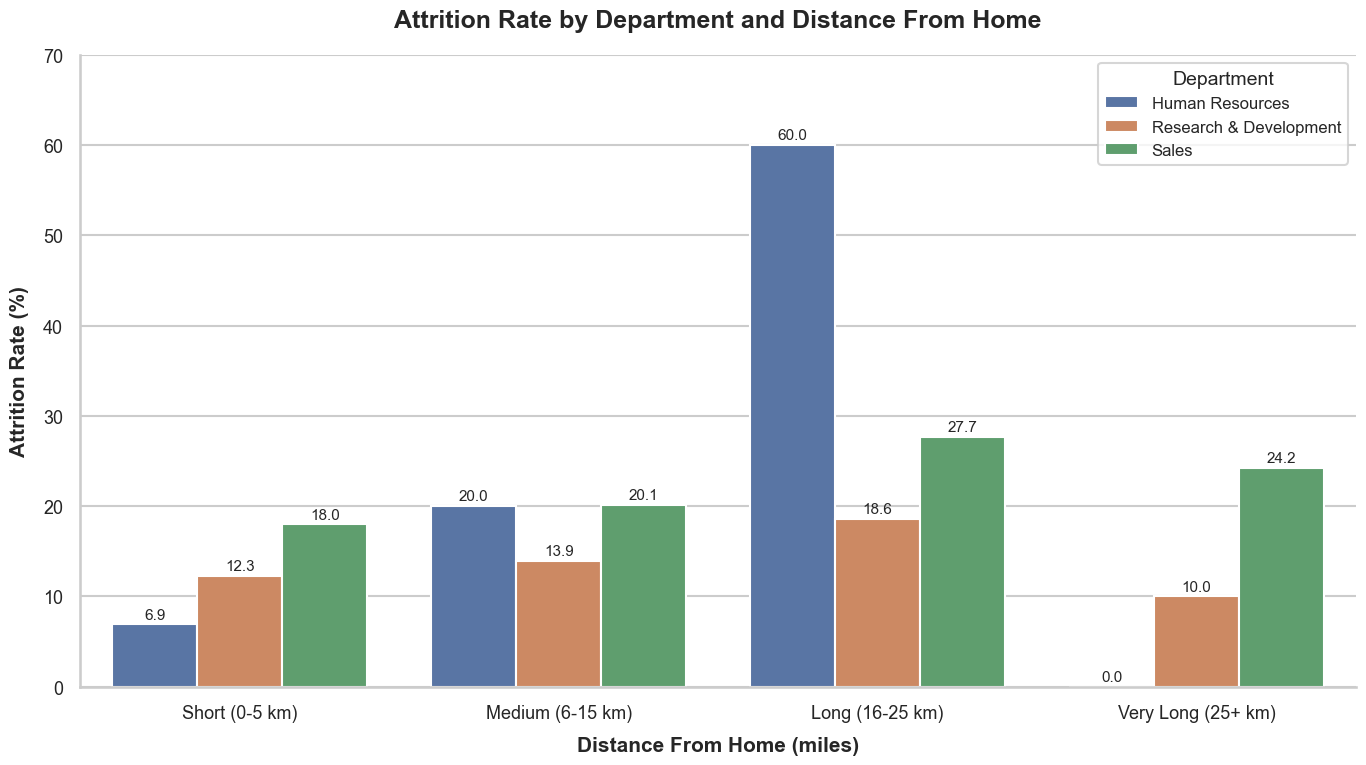

<Figure size 640x480 with 0 Axes>

In [258]:
# Combined graph: DistanceFromHome + Department + AttritionRate (Professional style)

# Prepare the data if not already done (create bins)
#distance_bins = [0, 2, 5, 10, 15, 20, 25, employee_attrition['DistanceFromHome'].max()]
#distance_labels = ['0-2', '3-5', '6-10', '11-15', '16-20', '21-25', f"26-{int(employee_attrition['DistanceFromHome'].max())}"]

distance_bins = [0, 5, 15, 25, employee_attrition['DistanceFromHome'].max()]
distance_labels = ['Short (0-5 km)', 'Medium (6-15 km)', 'Long (16-25 km)', 'Very Long (25+ km)']

employee_attrition['DistanceBin'] = pd.cut(
    employee_attrition['DistanceFromHome'],
    bins=distance_bins, labels=distance_labels, right=True, include_lowest=True
)

# Calculate attrition rate by Department and DistanceBin
attrition_by_dept_distance = (
    employee_attrition
        .groupby(['Department', 'DistanceBin'])['AttritionFlag']
        .mean()
        .mul(100)
        .reset_index()
)

# Professional bar plot: x=DistanceBin, hue=Department
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=attrition_by_dept_distance,
    x='DistanceBin',
    y='AttritionFlag',
    hue='Department'
)
plt.title("Attrition Rate by Department and Distance From Home", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Distance From Home (miles)", fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel("Attrition Rate (%)", fontsize=15, fontweight='bold', labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, min(100, attrition_by_dept_distance['AttritionFlag'].max() + 10))
plt.legend(title="Department", fontsize=12, title_fontsize=14)
for c in ax.containers:
    plt.bar_label(c, fmt="%.1f", padding=2, fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()
plt.savefig("Attrition Rate by Department and Distance From Home_graph.png", dpi=300, bbox_inches="tight")


**Insight:**

Sales consistently shows the highest attrition rates across all distance categories;

Human Resources also demonstrates higher attrition compared to Research & Development, particularly for employees living farther from work;

Research & Development shows the lowest attrition rates regardless of distance;

Attrition rates generally tend to increase with greater distance from home, especially for Sales and HR;

however, for Research & Development, attrition remains relatively low and stable even at greater distances;

This suggests distance has a stronger effect on attrition for Sales and HR departments than for R&D.